In [2]:
import numpy as np

# Training Data Set 준비
# x_data => 독립변수(공부시간)
x_data = np.array([1, 2, 3, 4, 5], dtype=np.float64).reshape(5,1)
# t_data => 정답데이터(시험점수)
t_data = np.array([3, 5, 7, 9, 11], dtype=np.float64).reshape(5,1)

# Weight & bias 정의
W = np.random.rand(1,1)  # 1행 1열짜리(값은 1개) ndarray를 만들고
                         # 0과 1사이의 균등분포에서 실수 난수를 추출
b = np.random.rand(1)     

# predict function (예측 함수, 모델, hypothesis)
def predict(x):
    y = np.dot(x,W) + b
    
    return y


# loss function
def loss_func(input_data):   # loss 함수는 w와 b의 함수
                             # input_data =>  [W b]
    
    input_W = input_data[0].reshape(1,1)
    input_b = input_data[1]
    
    # 예측값
    y = np.dot(x_data,input_W) + input_b
    
    # MSE를 구해요(평균제곱오차)
    return np.mean(np.power(t_data-y,2))


# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f,x):    # x : ndarray [1.0  2.0]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray [0.9999  2.0]  
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              #  x : ndarray [1.0  2.0]  
        it.iternext()
        
    return derivative_x

# learing rate의 값을 설정해야 해요!
# learing rate는 우리가 설정해야 하는 값이예요. 학습이 진행되는 과정을
# 살펴보면서 이 값을 적절하게 수정해야 해요! 초기에는 1e-4, 1e-3 정도로
# 설정해서 사용해요!
learning_rate = 1e-4


# 학습과정을 진행!
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))

W : [[0.39223151]], b:[0.05433616], loss:38.4508460808067
W : [[2.04667751]], b:[0.83147938], loss:0.005169151040819399
W : [[2.01692779]], b:[0.93888531], loss:0.0006798364060827919
W : [[2.00613893]], b:[0.97783651], loss:8.941072438895617e-05
W : [[2.00222631]], b:[0.99196232], loss:1.175911964148545e-05
W : [[2.00080738]], b:[0.9970851], loss:1.546535895863309e-06
W : [[2.0002928]], b:[0.9989429], loss:2.033973077974383e-07
W : [[2.00010619]], b:[0.99961664], loss:2.675040710675661e-08
W : [[2.00003851]], b:[0.99986097], loss:3.5181600392871332e-09
W : [[2.00001397]], b:[0.99994958], loss:4.6270137160419713e-10


In [3]:
# 6시간 공부하면 몇점일지를 예측해 보아요!

predict_date = predict(np.array([[6]]))
print('6시간 공부했을 때 점수 : ', predict_date)

6시간 공부했을 때 점수 :  [[13.0000121]]


In [5]:
# Python으로 아주 간단한 Simple Linear Regression을 이용해 머신러닝을
# 구현해 보았어요!
# sklearn (scikit-learn)  => 사용하려면 설치해야 겠죠!!!
import numpy as np
from sklearn import linear_model

# Training Data Set
x_data = np.array([1, 2, 3, 4, 5], dtype=np.float64).reshape(5,1)
t_data = np.array([3, 5, 7, 9, 11], dtype=np.float64).reshape(5,1)

# model 생성(Simple Linear Model) -> 완성된 모델은 아니지만 일단 모델을 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 학습이 끝났으니..구한 W와 b를 출력해 보아요!
print('W: {}, b: {}'.format(model.coef_, model.intercept_))

# model을 이용한 예측
print(model.predict(np.array([[6]])))  # [[13.]]

W: [[2.]], b: [1.]
[[13.]]


In [14]:
# Ozone량 예측하는 모델을 만들어 보아요!
# 데이터는 구글 드라이브에 공유된 CSV 파일을 이용할 꺼예요!
# Python 구현부터 해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

################################################
# 다변수 함수에 대한 수치미분을 수행하는 함수
def numerical_derivative(f,x):    # x : ndarray [1.0  2.0]
    
    delta_x = 1e-4
    derivative_x = np.zeros_like(x)   # derivative_x : [0.0  0.0]
    
    # iterator를 이용해서 입력변수 x에 대한 편미분을 수행!
    it = np.nditer(x, flags=['multi_index'])
    
    while not it.finished:
        
        idx = it.multi_index 
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray [1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray [0.9999  2.0]  
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx] = tmp              #  x : ndarray [1.0  2.0]  
        it.iternext()
        
    return derivative_x
################################################

# Raw Data Set Loading
df = pd.read_csv('./data/ozone.csv')
# display(df.head())

# Ozoen(오존량) : 종속변수
# Solar.R(태양광세기), Wind(바람), Temp(온도) : 독립변수
# 우리는 지금 Simple Linear Regression을 하고 있기 때문에 독립변수 1개만
# 사용. => 3개의 독립변수 중 Temp만 사용할꺼예요!
# 온도에 따른 오존량 예측 모델을 만들어 보아요!

training_data = df[['Ozone', 'Temp']]
# display(training_data)
# print(training_data.shape)  # (153, 2)

# 데이터에 결치값이 존재해요!
# training_data.info()
# Missing Value(결치값)를 삭제하는 방법(데이터가 충분히 많을때 좋아요!)
# Missing Value(결치값)를 다른 값으로 대체(데이터가 많이 없으면)
# 여기서는 결치값을 삭제할꺼예요!
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제
# training_data.info()

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))


C:\Users\campusseven02\AppData\Local\Temp\ipykernel_10848\3566042649.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


W : [[0.5037423]], b:[0.4038918], loss:889.4386781661431
W : [[0.71863304]], b:[-11.87261885], loss:817.3549305998857
W : [[0.86106835]], b:[-23.12728385], loss:775.0991223191764
W : [[0.99163993]], b:[-33.4445244], loss:739.5893096705973
W : [[1.11133592]], b:[-42.90242053], loss:709.7485174657936
W : [[1.22106219]], b:[-51.57254882], loss:684.6717059318471
W : [[1.32164913]], b:[-59.5205241], loss:663.598321807417
W : [[1.41385798]], b:[-66.80649599], loss:645.8892315646888
W : [[1.49838655]], b:[-73.48560413], loss:631.0073371629517
W : [[1.57587457]], b:[-79.60839547], loss:618.5012864315527


In [15]:
# 학습종료 후 예측 (Temp : 62)
predict_data = predict(np.array([[62]]))
print('온도가 62일때 오존량 : {}'.format(predict_data))  # [[16.88715564]]

온도가 62일때 오존량 : [[16.88715564]]


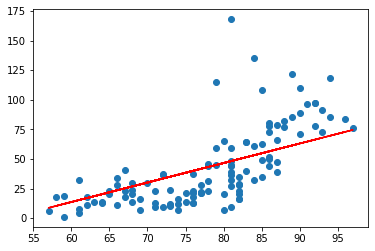

In [17]:
# 그래프로 표현해 보아요!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

sklearn으로 구한 온도가 62도 일때의 오존량 : [[3.58411393]]


C:\Users\campusseven02\AppData\Local\Temp\ipykernel_10848\3247804505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


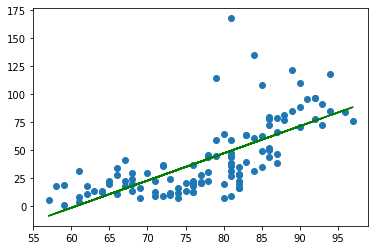

In [20]:
# 같은 데이터로 sklearn을 이용해서 구현해 보아요!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[3.58411393]]

# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), 
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()